FIRST_APPROACH
TOP_5 FEATURES

FIRST_APPROACH
TOP_5 FEATURES

 Gradient Boosting (Top 5 Correlated Features)
R²   (R-squared):              -0.6578
MSE  (Mean Squared Error):     38776794394858.55
MAPE (Mean Absolute % Error):  46.29%

 Gradient Boosting (Top 5 Correlated + Log Target)
R²   (R-squared):              0.1906
MSE  (Mean Squared Error):     18931241432454.38
MAPE (Mean Absolute % Error):  38.55%

 Polynomial Regression (Top 5 Correlated Features)
R²   (R-squared):              -0.1751
MSE  (Mean Squared Error):     27486674565123.46
MAPE (Mean Absolute % Error):  45.09%

 Linear Regression (Top 5 Correlated Features)
R²   (R-squared):              -0.0532
MSE  (Mean Squared Error):     24634189615675.81
MAPE (Mean Absolute % Error):  49.71%

 Random Forest (Top 5 Correlated Features)
R²   (R-squared):              -0.0420
MSE  (Mean Squared Error):     24371512160585.58
MAPE (Mean Absolute % Error):  45.60%

 XGBoost (Top 5 Correlated Features)
R²   (R-squared):              -0.8732
MSE  (Mean Squared Error):     43815114619895.70
MAPE (Mean Absolute % Error):  49.60%


GradientBoostingRegressor

In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_test_encoded.csv"

# Load datasets
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

# 🔹 Step 1: Get top 5 features most correlated with the target
corr_matrix = df_train.corr(numeric_only=True)
target_corr = corr_matrix['Total_Returns_NextYear'].drop('Total_Returns_NextYear')
target_corr_sorted = target_corr.reindex(target_corr.abs().sort_values(ascending=False).index)
top_5_features = target_corr_sorted.head(5).index.tolist()

# 🔹 Step 2: Filter the datasets
columns_to_keep = top_5_features + ['Year', 'Total_Returns_NextYear']
df_train_top5 = df_train[columns_to_keep]
df_test_top5 = df_test[columns_to_keep]

# 🔹 Step 3: Prepare training and testing data
X_train = df_train_top5.drop('Total_Returns_NextYear', axis=1)
y_train = df_train_top5['Total_Returns_NextYear']
X_test = df_test_top5.drop('Total_Returns_NextYear', axis=1)
y_test = df_test_top5['Total_Returns_NextYear']

# 🔹 Step 4: Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(
    n_estimators=200, 
    learning_rate=0.05, 
    max_depth=4, 
    random_state=42
)
gbr.fit(X_train, y_train)

# 🔹 Step 5: Predict and evaluate
y_pred = gbr.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

# 🔹 Step 6: Show results
print(" Gradient Boosting (Top 5 Correlated Features)")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")


 Gradient Boosting (Top 5 Correlated Features)
R²   (R-squared):              -0.6578
MSE  (Mean Squared Error):     38776794394858.55
MAPE (Mean Absolute % Error):  46.29%


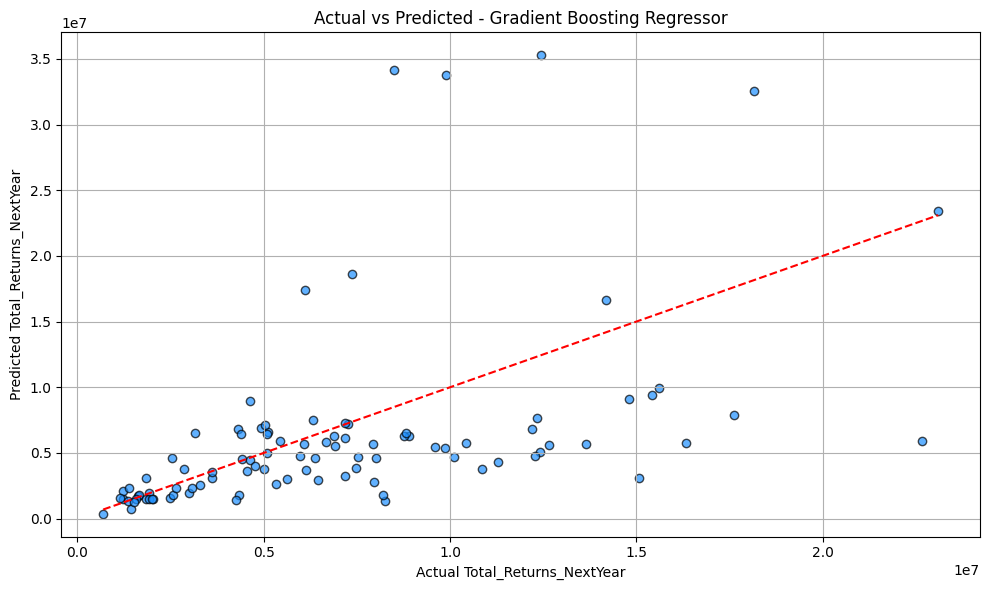

In [2]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='dodgerblue', edgecolor='k', alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Ideal line
plt.xlabel("Actual Total_Returns_NextYear")
plt.ylabel("Predicted Total_Returns_NextYear")
plt.title("Actual vs Predicted - Gradient Boosting Regressor")
plt.grid(True)
plt.tight_layout()
plt.show()


In [3]:
import pandas as pd 
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_test_encoded.csv"

#  Load original datasets
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

#  Step 1: Select Top 5 features by correlation with the target
corr_matrix = df_train.corr(numeric_only=True)
target_corr = corr_matrix['Total_Returns_NextYear'].drop('Total_Returns_NextYear')
top_5_features = target_corr.abs().sort_values(ascending=False).head(5).index.tolist()

#  Step 2: Filter features + 'Year' + target
columns_to_keep = top_5_features + ['Year', 'Total_Returns_NextYear']
df_train_top5 = df_train[columns_to_keep]
df_test_top5 = df_test[columns_to_keep]

#  Step 3: Split into X and y
X_train = df_train_top5.drop('Total_Returns_NextYear', axis=1)
y_train = df_train_top5['Total_Returns_NextYear']
X_test = df_test_top5.drop('Total_Returns_NextYear', axis=1)
y_test = df_test_top5['Total_Returns_NextYear']

#  Step 4: Apply log1p to avoid log(0) errors
y_train_log = np.log1p(y_train)

#  Step 5: Train Gradient Boosting on log-transformed target
gbr = GradientBoostingRegressor(
    n_estimators=200, 
    learning_rate=0.05, 
    max_depth=4, 
    random_state=42
)
gbr.fit(X_train, y_train_log)

#  Step 6: Predict and inverse log
y_pred_log = gbr.predict(X_test)
y_pred = np.expm1(y_pred_log)

#  Step 7: Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

#  Step 8: Print results
print(" Gradient Boosting (Top 5 Correlated + Log Target)")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")


 Gradient Boosting (Top 5 Correlated + Log Target)
R²   (R-squared):              0.1906
MSE  (Mean Squared Error):     18931241432454.38
MAPE (Mean Absolute % Error):  38.55%


******************************************************************************************

Polynomial Regression

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_test_encoded.csv"

#  Load original datasets
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

#  Step 1: Select Top 5 features by correlation
corr_matrix = df_train.corr(numeric_only=True)
target_corr = corr_matrix['Total_Returns_NextYear'].drop('Total_Returns_NextYear')
top_5_features = target_corr.abs().sort_values(ascending=False).head(5).index.tolist()

#  Step 2: Filter the data
columns_to_keep = top_5_features + ['Year', 'Total_Returns_NextYear']
df_train_top5 = df_train[columns_to_keep]
df_test_top5 = df_test[columns_to_keep]

#  Step 3: Split features and target
X_train = df_train_top5.drop('Total_Returns_NextYear', axis=1)
y_train = df_train_top5['Total_Returns_NextYear']
X_test = df_test_top5.drop('Total_Returns_NextYear', axis=1)
y_test = df_test_top5['Total_Returns_NextYear']

#  Step 4: Create polynomial features
poly = PolynomialFeatures(degree=2, include_bias=False)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

#  Step 5: Train the model
model = LinearRegression()
model.fit(X_train_poly, y_train)

#  Step 6: Predict and evaluate
y_pred = model.predict(X_test_poly)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

#  Step 7: Print results
print(" Polynomial Regression (Top 5 Correlated Features)")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")


 Polynomial Regression (Top 5 Correlated Features)
R²   (R-squared):              -0.1751
MSE  (Mean Squared Error):     27486674565123.46
MAPE (Mean Absolute % Error):  45.09%


**************************************************************************************************

Linear Regression

In [5]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_test_encoded.csv"

#  Load datasets
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

#  Step 1: Compute correlation with target
corr_matrix = df_train.corr(numeric_only=True)
target_corr = corr_matrix['Total_Returns_NextYear'].drop('Total_Returns_NextYear')
top_5_features = target_corr.abs().sort_values(ascending=False).head(5).index.tolist()

#  Step 2: Keep only top 5 + 'Year' + target
columns_to_keep = top_5_features + ['Year', 'Total_Returns_NextYear']
df_train_top5 = df_train[columns_to_keep]
df_test_top5 = df_test[columns_to_keep]

#  Step 3: Split into features and labels
X_train = df_train_top5.drop('Total_Returns_NextYear', axis=1)
y_train = df_train_top5['Total_Returns_NextYear']
X_test = df_test_top5.drop('Total_Returns_NextYear', axis=1)
y_test = df_test_top5['Total_Returns_NextYear']

#  Step 4: Train the model
model = LinearRegression()
model.fit(X_train, y_train)

#  Step 5: Predict and evaluate
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

#  Step 6: Print metrics
print(" Linear Regression (Top 5 Correlated Features)")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")


 Linear Regression (Top 5 Correlated Features)
R²   (R-squared):              -0.0532
MSE  (Mean Squared Error):     24634189615675.81
MAPE (Mean Absolute % Error):  49.71%


*****************************************************************************

Random Forest model

In [6]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_test_encoded.csv"

#  Load datasets
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

#  Step 1: Get Top 5 most correlated features with the target
corr_matrix = df_train.corr(numeric_only=True)
target_corr = corr_matrix['Total_Returns_NextYear'].drop('Total_Returns_NextYear')
top_5_features = target_corr.abs().sort_values(ascending=False).head(5).index.tolist()

#  Step 2: Keep only top 5 + 'Year' + target
columns_to_keep = top_5_features + ['Year', 'Total_Returns_NextYear']
df_train_top5 = df_train[columns_to_keep]
df_test_top5 = df_test[columns_to_keep]

#  Step 3: Split into X and y
X_train = df_train_top5.drop('Total_Returns_NextYear', axis=1)
y_train = df_train_top5['Total_Returns_NextYear']
X_test = df_test_top5.drop('Total_Returns_NextYear', axis=1)
y_test = df_test_top5['Total_Returns_NextYear']

#  Step 4: Train Random Forest model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

#  Step 5: Predict
y_pred = rf.predict(X_test)

#  Step 6: Evaluate
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

#  Step 7: Print metrics
print(" Random Forest (Top 5 Correlated Features)")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")


 Random Forest (Top 5 Correlated Features)
R²   (R-squared):              -0.0420
MSE  (Mean Squared Error):     24371512160585.58
MAPE (Mean Absolute % Error):  45.60%


***********************************************************************

XGBoost Regressor

In [7]:
import pandas as pd
import numpy as np
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error

# File paths
train_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_train_encoded.csv"
test_path = r"C:\Users\MuriloFarias\Desktop\NNS-JULIA\PredictSalmonRuns\murilo_salmon\BristolBay\FIRST_APPROACH\data_test_encoded.csv"

#  Load datasets
df_train = pd.read_csv(train_path)
df_test = pd.read_csv(test_path)

#  Step 1: Get top 5 correlated features
corr_matrix = df_train.corr(numeric_only=True)
target_corr = corr_matrix['Total_Returns_NextYear'].drop('Total_Returns_NextYear')
top_5_features = target_corr.abs().sort_values(ascending=False).head(5).index.tolist()

#  Step 2: Filter columns
columns_to_keep = top_5_features + ['Year', 'Total_Returns_NextYear']
df_train_top5 = df_train[columns_to_keep]
df_test_top5 = df_test[columns_to_keep]

#  Step 3: Split X and y
X_train = df_train_top5.drop('Total_Returns_NextYear', axis=1)
y_train = df_train_top5['Total_Returns_NextYear']
X_test = df_test_top5.drop('Total_Returns_NextYear', axis=1)
y_test = df_test_top5['Total_Returns_NextYear']

#  Step 4: Train XGBoost Regressor
xgb_model = XGBRegressor(objective='reg:squarederror', random_state=42)
xgb_model.fit(X_train, y_train)

#  Step 5: Predict and evaluate
y_pred = xgb_model.predict(X_test)
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

#  Step 6: Print results
print(" XGBoost (Top 5 Correlated Features)")
print(f"R²   (R-squared):              {r2:.4f}")
print(f"MSE  (Mean Squared Error):     {mse:.2f}")
print(f"MAPE (Mean Absolute % Error):  {mape:.2f}%")


 XGBoost (Top 5 Correlated Features)
R²   (R-squared):              -0.8732
MSE  (Mean Squared Error):     43815114619895.70
MAPE (Mean Absolute % Error):  49.60%
